In [26]:
import networkx as nx
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd
from  matplotlib.colors import LinearSegmentedColormap, ListedColormap
import geopandas as gpd

# set default font sizes for plots
import matplotlib
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)
matplotlib.rc('font',size = 20)
matplotlib.rc('legend',fontsize = 20)
matplotlib.rc('figure',titlesize = 20)

In [7]:
def signed_clique(n, l):
    
    ### creates the adjacency matrix of a signed clique K_n(K_l^-)  ###
    
    A = np.ones((n,n))  # overall positive clique
      
    A[:l,:l] *= -1  # negative clique inside 
    
    A -= np.diag(np.diag(A))  # remove diagonal elements
    
    return A
    
    
    
def local_balance(A):   
    
    ### find node balance of a given country for one specific graph (i.e. one year)   ###
    
    # calculate signed communicability
    A0 = np.abs(A)
    
    Comm = la.expm(A)
    Comm0 = la.expm(A0)
    
    # calculate balance
    Ki = np.diag(Comm)/np.diag(Comm0)       # node balance
    
    return Ki

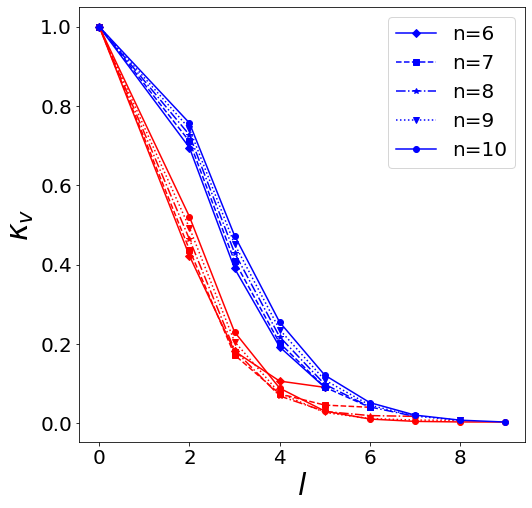

In [43]:
fig, ax = plt.subplots(figsize = (8,8))

nv = np.arange(6,11)

ls = ['solid', '--', '-.', ':', 'solid']
marker = ['D', 's', '*', 'v', 'o']

for i, n in enumerate(nv):
    
    lv = np.insert(np.arange(2,n),0,0)  # this is to avoid the negative clique of one node, which is not well-defined
    
    # initialize arrays with the local balance of the two types of nodes
    K_bal = np.zeros(len(lv))
    K_unb = np.zeros(len(lv))
    
    # calculate balance for each n and l
    for j, l in enumerate(lv):
        
        A = signed_clique(n,l)
        K = local_balance(A)
        
        K_bal[j] = K[-1]
        K_unb[j] = K[0]
        
    # plot
    ax.plot(lv, K_unb, color = 'red', ls = ls[i], marker = marker[i])
    ax.plot(lv, K_bal, color = 'blue', ls = ls[i], marker = marker[i], label = f'n={n}')
    
ax.legend()
ax.set_xlabel(r'$l$', fontsize = 30)    
ax.set_ylabel(r'$\kappa_v$', fontsize = 30)    
    
plt.savefig('signed_cliques.pdf')